**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_df= pd.concat(data)
#print(asos_df.head())

data = [pd.read_csv('snotel_df.dat', parse_dates = True, index_col = 'Date_Time')]
snotel_df= pd.concat(data)
#print(snotel_df.head())

asos_df['CloudCover'][asos_df['CloudCover']==9] = np.NaN   ## Discovered that 9 values in CC data are actually missing

print(asos_df.head())


                     Temperature_degC  Dewpoint_degC  Pressure_hp  \
Date_Time                                                           
2006-01-01 01:00:00              -1.0           -7.0          NaN   
2006-01-01 02:00:00              -3.0           -8.0          NaN   
2006-01-01 03:00:00              -4.0           -8.0          NaN   
2006-01-01 04:00:00              -4.0           -9.0          NaN   
2006-01-01 05:00:00              -5.0           -8.0          NaN   

                     WindDirection_deg  WindSpeed_m/s  CloudCover  \
Date_Time                                                           
2006-01-01 01:00:00              220.0            7.7         NaN   
2006-01-01 02:00:00              230.0            5.1         NaN   
2006-01-01 03:00:00              230.0            3.6         NaN   
2006-01-01 04:00:00              240.0            6.2         NaN   
2006-01-01 05:00:00              210.0            6.2         NaN   

                     1hr_Precipi

In [3]:
   
asos2_files = glob(r'C:\Users\RAPP\Documents\Capstone\data\ASOS\724673-93009\724673-93009*')
print(asos2_files)

header_names = ('Year', 'Month', 'Day', 'Hour', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', \
                'LXV_WindSpeed_m/s', 'LXV_CloudCover', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm')
#asos_data = [pd.read_csv(f, delim_whitespace=True, header = None) for f in asos_files]
asos2_data = [pd.read_csv(f, delim_whitespace=True, header = None, names = header_names, parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']}, index_col='Date_Time') for f in asos2_files]
#parse_dates={'Date_Time': ['Year', 'Month', 'Day', 'Hour']
asos2_df= pd.concat(asos2_data)
xx = (asos2_df == -9999)
asos2_df[xx] = np.NaN

asos2_df['LXV_CloudCover'][asos2_df['LXV_CloudCover']==9] = np.NaN

asos2_df['LXV_Temperature_degC'] = asos2_df['LXV_Temperature_degC']/10
asos2_df['LXV_Dewpoint_degC'] = asos2_df['LXV_Dewpoint_degC']/10
asos2_df['LXV_Pressure_hp'] = asos2_df['LXV_Pressure_hp']/10
asos2_df['LXV_WindSpeed_m/s'] = asos2_df['LXV_WindSpeed_m/s']/10
asos2_df['LXV_1hr_Precipitation_mm'] = asos2_df['LXV_1hr_Precipitation_mm']/10
asos2_df['LXV_6hr_Precipitation_mm'] = asos2_df['LXV_6hr_Precipitation_mm']/10


print(asos2_df.describe())

print(asos2_df.head())


['C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2006', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2007', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2008', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2009', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2010', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2012', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2013', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2014', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2015', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2016', 'C:\\Users\\RAPP\\Documents\\Capstone\\data\\ASOS\\724673-93009\\724673-93009-2017']
       LXV_Temperature_degC  LXV_Dewpoint_degC  LXV_Pressure_hp 

In [4]:
asos_snotel_df = pd.merge(pd.merge(snotel_df, asos_df,on='Date_Time'),asos2_df['LXV_Pressure_hp'].to_frame(),on='Date_Time')

#asos_snotel_df = pd.merge(snotel_df, asos_df, on='Date_Time', how='outer')
#asos_snotel2_df = pd.merge(asos_snotel_df, asos2_df['LAX_Pressure_hp'].to_frame(), on='Date_Time', how='outer')

print(asos_snotel_df.describe())


       TOBS.I-1 (degC)   SNWD.I-1 (in)   Temperature_degC  Dewpoint_degC  \
count      86444.000000    75614.000000      70140.000000   70012.000000   
mean           1.344517       21.228675          1.471614      -9.001614   
std            9.113844       20.737132          9.264100       8.119956   
min          -28.600000       -3.000000        -28.000000     -45.000000   
25%           -5.000000        0.000000         -5.000000     -14.000000   
50%            1.300000       19.000000          1.000000      -9.000000   
75%            7.700000       40.000000          9.000000      -3.000000   
max           25.100000      187.000000         24.000000      10.000000   

       Pressure_hp  WindDirection_deg  WindSpeed_m/s    CloudCover  \
count          0.0       65194.000000   65194.000000  55094.000000   
mean           NaN         229.770991       5.979518      3.010146   
std            NaN          74.560285       3.411926      3.537420   
min            NaN           0.0000

## Determining Outliers

**Check to see how well the raw data might fit a normal distribution**

**With the exception of temperature, it is very apperant none of these really fit a normally distributed pattern.  I would suspect that snow depth would more so if 0" observations were eliminated.  As far as determining outlers, it is difficult to determine from these plots.  However, one does see a slight blip near 200" on the snowdepth plot, which seems suspicious.  Some boxplots will be created next to see if there are some extreme values worth noting**

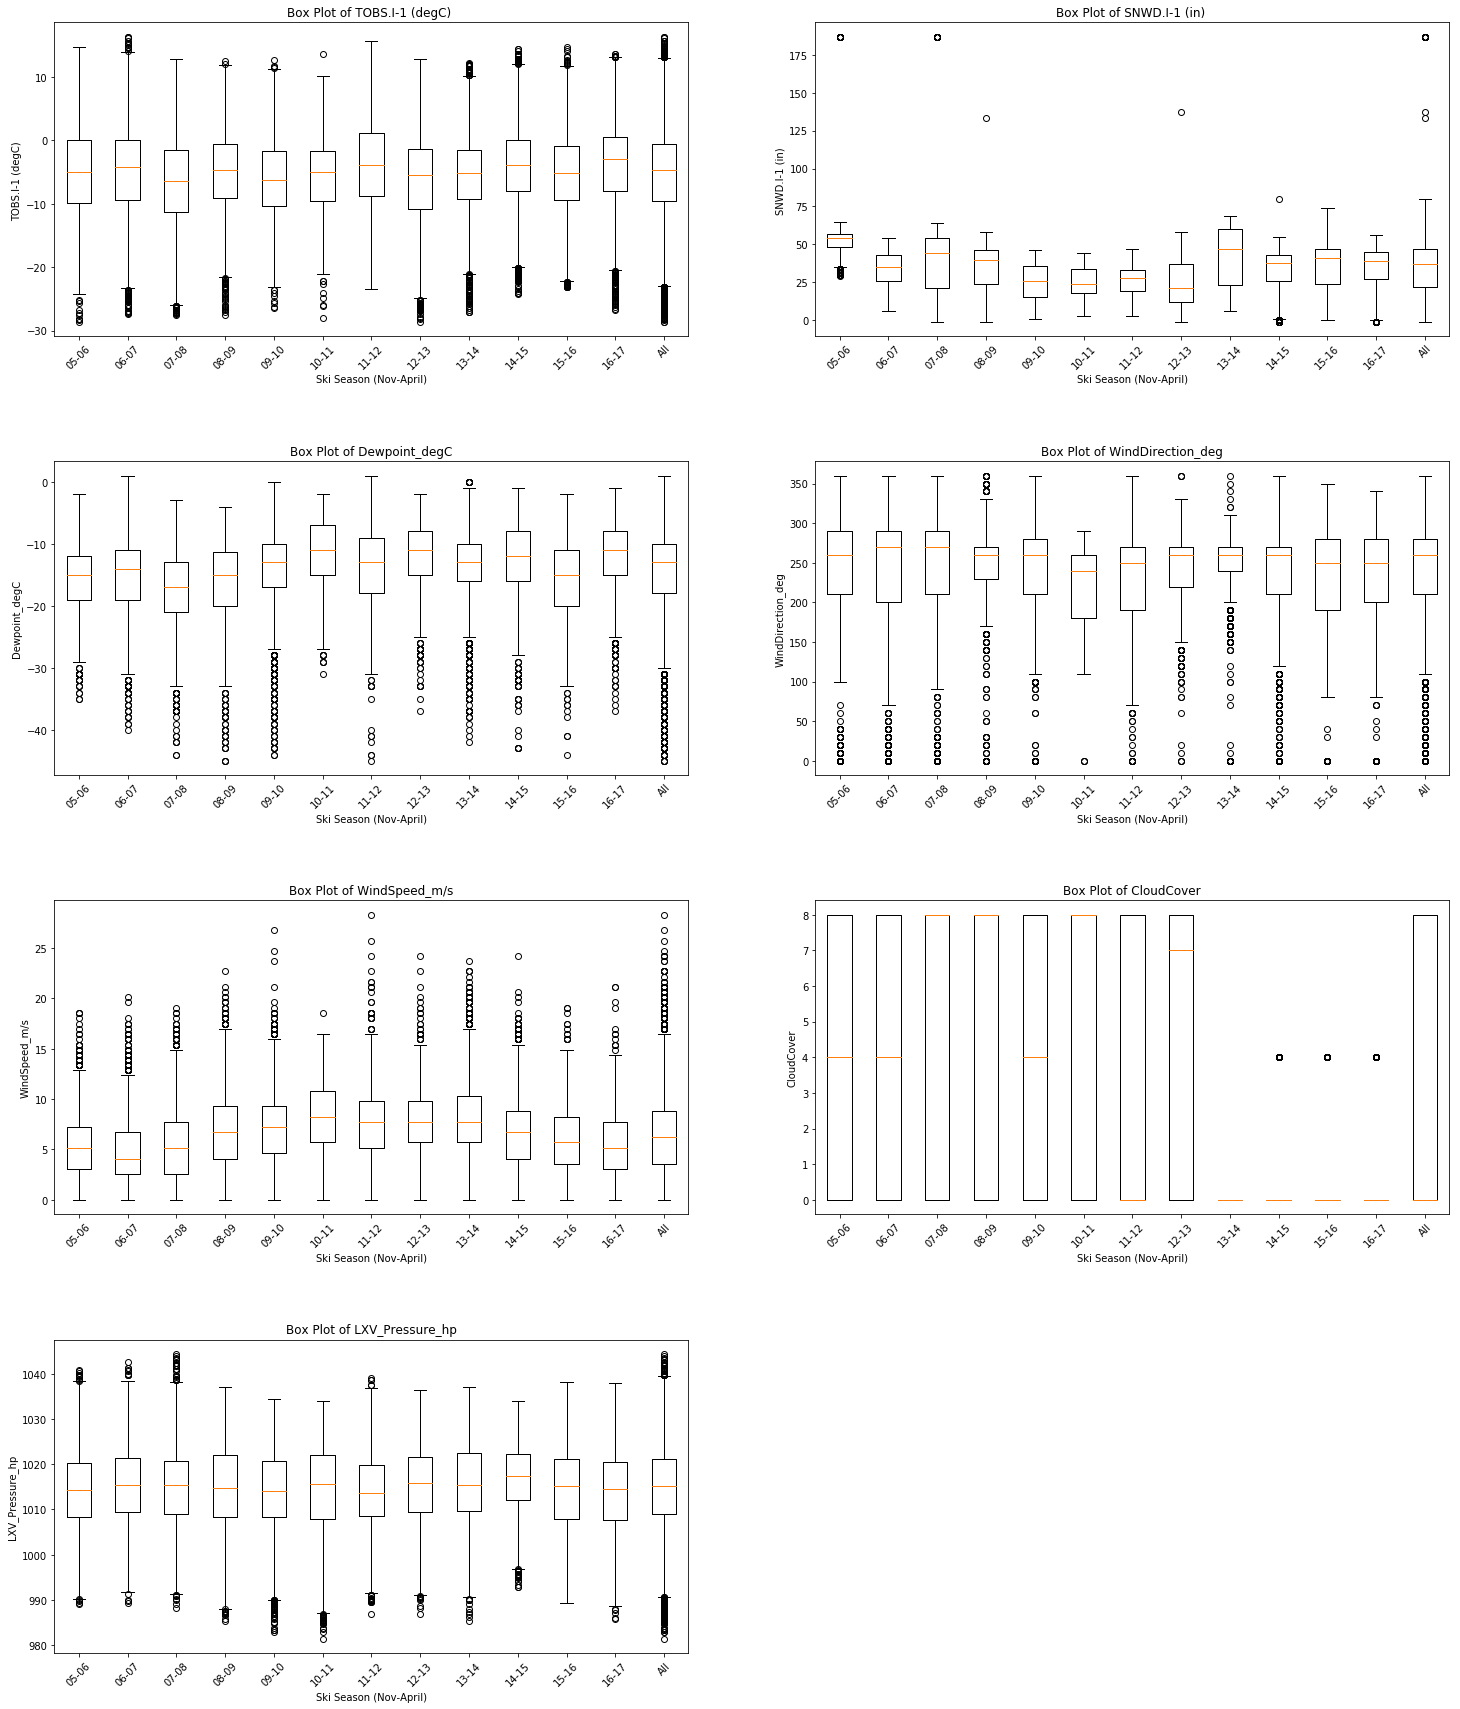

In [5]:
fig = plt.figure(figsize=(25,30))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
keys = ['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover', 'LXV_Pressure_hp']


for k in range(len(keys)):
    ax = plt.subplot(4, 2, k+1)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'



    filtered_data = asos_snotel_df[keys[k]][~np.isnan(asos_snotel_df[keys[k]])]

    merged_seasons =  pd.concat([filtered_data['11-2005':'04-2006'], filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

    filtered_data2 = [filtered_data['11-2005':'04-2006'], filtered_data['11-2006':'04-2007'] , filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]

    plot =ax.boxplot(filtered_data2)
    plt.title('Box Plot of ' + keys[k])
    labels = ['05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
    ax.set_xticklabels(labels, rotation = 45)
    ax.set_xlabel('Ski Season (Nov-April)')
    ax.set_ylabel(keys[k])

**These box plots do illuminate some interesting data characteristics to be aware. The distributions of data seem reasonable for all variables except 2010-2011 Wind Direction,  2013-2017 Cloudcover, and 07-08, 08-09, 12-13 Snow Depth Data.  One would expect there to be winds in virtually every direction over a season; however it does not appear that happened in years 10-11.  This could be due to a large amount of data missing that year.  CloudCover seems very anommalous for years 13-17 as the only value looks to be 4.  Finally, the values which fall far outside the distribution of the snow depth data are also questionable. Additional investigation will be made by looking at timeseries plots..

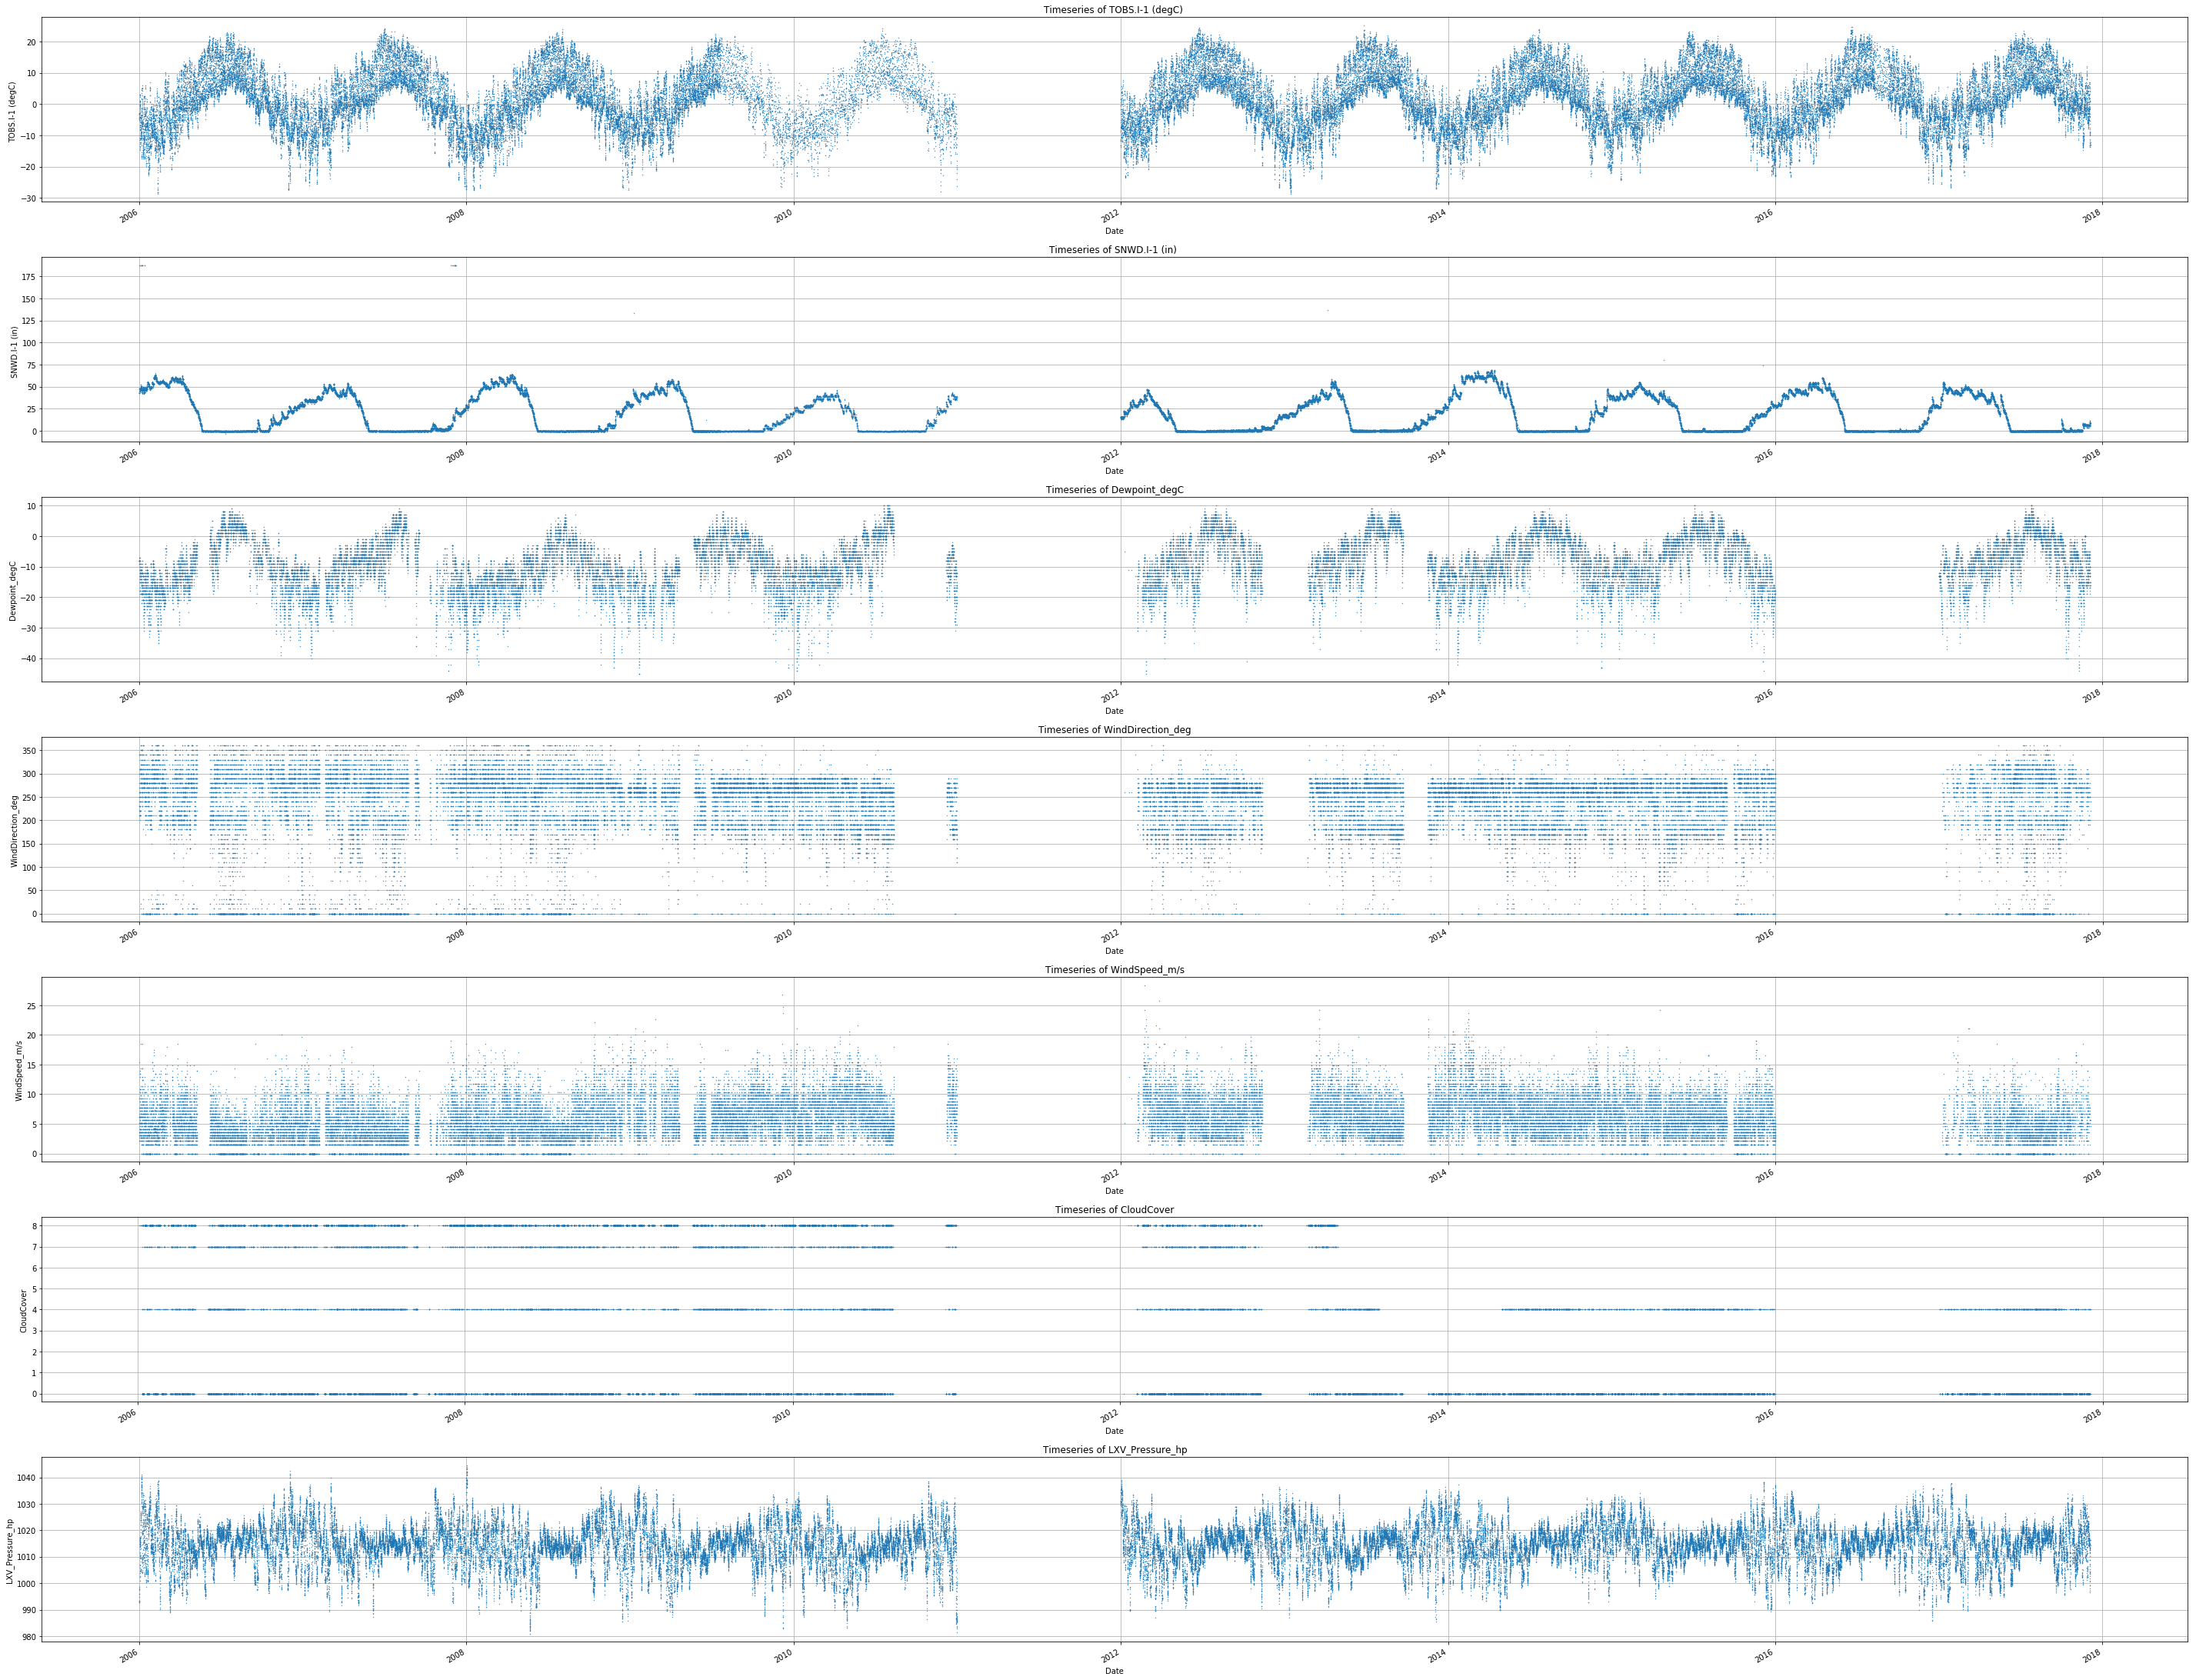

In [6]:
ax = None


fig = plt.figure(figsize=(50,75))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for k in range(len(keys)):
    ax = plt.subplot(12, 1, k+1)
    asos_snotel_df[keys[k]]['2005':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 0.75)
    ax.set_xlabel("Date")
    ax.set_ylabel(keys[k])
    
    plt.title("Timeseries of " + keys[k])
 
    plt.grid()
    plt.axis('tight')
  

plt.show()



**Cloud cover data is very suspicious beginning in year 2013, so all data after that point will be removed**

In [7]:
asos_snotel_df['CloudCover']['2013':'2017'] = np.NaN

In [8]:
years = ['2006', '2007', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

for y in years:
    print("Year: "+ y + " - Snow Depth Max: " + str(round(asos_snotel_df['SNWD.I-1 (in) '][y].max(),2)) + " - Snow Depth Min: " + str(round(asos_snotel_df['SNWD.I-1 (in) '][y].min(),2)))


Year: 2006 - Snow Depth Max: 187.0 - Snow Depth Min: -3.0
Year: 2007 - Snow Depth Max: 187.0 - Snow Depth Min: -1.0
Year: 2007 - Snow Depth Max: 187.0 - Snow Depth Min: -1.0
Year: 2008 - Snow Depth Max: 64.0 - Snow Depth Min: -1.0
Year: 2009 - Snow Depth Max: 133.0 - Snow Depth Min: -1.0
Year: 2010 - Snow Depth Max: 46.0 - Snow Depth Min: -1.0
Year: 2011 - Snow Depth Max: nan - Snow Depth Min: nan
Year: 2012 - Snow Depth Max: 47.0 - Snow Depth Min: -1.0
Year: 2013 - Snow Depth Max: 137.0 - Snow Depth Min: -1.0
Year: 2014 - Snow Depth Max: 69.0 - Snow Depth Min: -1.0
Year: 2015 - Snow Depth Max: 80.0 - Snow Depth Min: -1.0
Year: 2016 - Snow Depth Max: 60.0 - Snow Depth Min: -1.0
Year: 2017 - Snow Depth Max: 56.0 - Snow Depth Min: -1.0


**It can be seen from the snow depth plot there are various spikes in the dataset which are physically unrealistic.  Therefore, snowdepth values >100 will be thrown out, along with snowdepth values greater then 70 in year 2015.  Also, snow depth values less then -100 will be eliminated: **

In [9]:
plt.figure(figsize=(15,5))

xx=(asos_snotel_df['SNWD.I-1 (in) ']<-100) | (asos_snotel_df['SNWD.I-1 (in) ']>100) | (asos_snotel_df['SNWD.I-1 (in) ']['2015']>70)
asos_snotel_df['SNWD.I-1 (in) '][xx]=np.NaN
#snotel_filled_df = snotel_df.interpolate(limit=3)


<Figure size 1080x360 with 0 Axes>

Text(0,0.5,'Snow Depth (inches)')

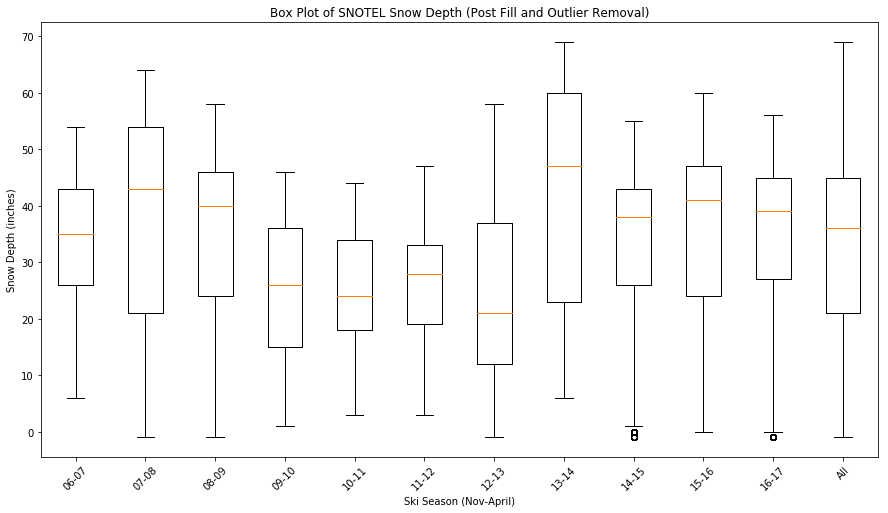

In [10]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
#fig.suptitle = 'Boxplot by Ski Season (November - April)'

filtered_data = asos_snotel_df['SNWD.I-1 (in) '][~np.isnan(asos_snotel_df['SNWD.I-1 (in) '])]


merged_seasons =  pd.concat([filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017']], axis = 0)

filtered_data2 = [filtered_data['11-2006':'04-2007'], filtered_data['11-2007':'04-2008'], \
                 filtered_data['11-2008':'04-2009'],filtered_data['11-2009':'04-2010'],filtered_data['11-2010':'04-2011'], \
                 filtered_data['11-2011':'04-2012'],filtered_data['11-2012':'04-2013'],filtered_data['11-2013':'04-2014'], \
                 filtered_data['11-2014':'04-2015'],filtered_data['11-2015':'04-2016'],filtered_data['11-2016':'04-2017'], merged_seasons]

plot =ax.boxplot(filtered_data2)
plt.title('Box Plot of SNOTEL Snow Depth (Post Fill and Outlier Removal)')
labels = ['06-07', '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', 'All']
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Ski Season (Nov-April)')
ax.set_ylabel('Snow Depth (inches)')

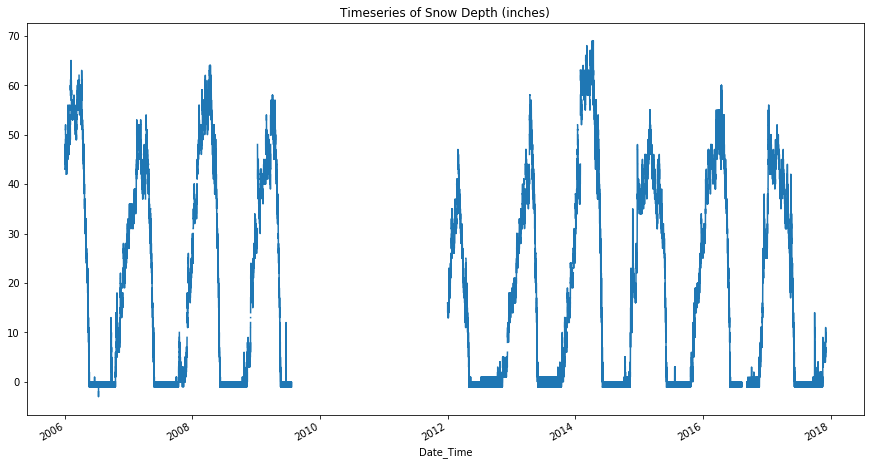

In [11]:
fig2 = plt.figure(figsize=(15,8))

asos_snotel_df['SNWD.I-1 (in) ']['2006':'2017'].plot(linewidth=None,  markersize = 0.00001)
ax.set_xlabel("Date")
ax.set_ylabel('SNWD.I-1 (in) ')
plt.title("Timeseries of Snow Depth (inches)")
  

plt.show()

In [12]:
asos_snotel_df.to_csv('asos_snotel_inter_clean_df.dat',sep = ',', float_format = '%.2f')